In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import pymc3 as pm
import theano
import theano.tensor as tt

# Random variables and probability distributions

![](images/random-variable-1.svg)

* Random != unpredictable, but only means we are uncertain of its exact value
* We express our uncertainty of the possible values of x in an probability distribution
    * Discrete probability distributions
    * Continuous probability distributions
    * Probability functions $P(x)$ map $x$ to a probability of x being equal to that value.
    * A probability distribution spans all possible values of $x$, which means the total probability == 1. $$\int{P(x)} dx = 1$$



In [3]:
HTML("""
<h2>Discrete probability distributions</h2>

<img src=images/dieprob.png width=600px />
<ul>
<li>Maps discrete values x to a probability <b>mass</b> Pmf(x)</li>
<li>Examples:</li>
    <ul>
        <li>Dice</li>
        <li>Head / Tails</li>
        <li>Having a flat tire tommorow</li>
    </ul>
</ul>

What is P(x <= 5)
""")

## Continuous probability distributions

![](images/gauss.png)
* Maps continuous values to a probability **density** Pdf(x)
* Examples:
    * Length of people
    * Housing prices in Amsterdam
    * Duration of waiting time at dentist
    
How de we get probability mass outputs?

Try in python:

```python
from scipy import stats
norm = stats.norm()
```

$\mu = 0$

$\sigma = 1$

What is $P(x > 0)$, $P(x > 0.02)$, $P(x < 0.69)$?

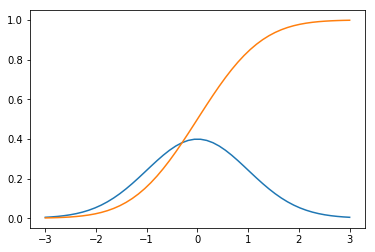

P(x > 0.02) 0.49202168628309806
P(x < 0.69) 0.7549029063256906


0.496

In [4]:
x = np.linspace(-3, 3)

norm = stats.norm(0, 1)

plt.plot(x, norm.pdf(x))
plt.plot(x, norm.cdf(x))
plt.show()


print('P(x > 0.02)', 1 - norm.cdf(0.02))
print('P(x < 0.69)', norm.cdf(0.69))

# monte carlo
n = 10000
(norm.rvs(n) > 0.02).sum() / n

## Two dimensional discrete distribution

* Two processes $x$ and $y$
* Only discrete values for $x$ and $y$ possible

![](images/2d-discrete.png)

## Two dimensional discrete distribution

Properties:
$$P(x, y) \ge 0$$
$$\sum_{x=0}^1\sum_{y=0}^1 P(x, y) = 1$$

## Two dimensional continuous distribution

* Two processes $x$ and $y$
* An infinite number of values for $x$ and $y$ possible

![](images/2d-continuous.png)

## Two dimensional continuous distribution

Properties:
$$P(x, y) \ge 0$$
$$\int_{x=-\infty}^ \infty \int_{y=-\infty}^\infty P(x, y) dx dy = 1$$

## Marginal probability: discrete

* Reducing a the dimensionality of a probability distribution. **ND -> (N - 1)D**

![](images/marginal1.png)

## Marginal probability: discrete

Answers previous sheet:
$$P(x=1) = P(x=1,y=1) + P(x=1, y=0) = 0.4$$

$$P(x) = \sum_{i=1}^{N_y} P(x, y=y_i)$$

Sum the probabilities in the margin

![](images/marginal2.png)

## Marginal probability: continuous

$$P(x) = \int_{y = -\infty}^\infty P(x, y) dy$$

Can be approximated by sampling:

![](images/marginal3.png)

## Conditional probability: discrete

![](images/conditional_prob.png)

## Conditional probability: continuous

![](images/conditional_prob_continuous.png)

## Bayes' formula

Jointly distributed events can be written as a multiplication of a marginal and conditional distribution.
$$P(A,B) = P(B) \cdot P(A|B)$$

And can be written for both **
$$P(A,B) = P(A) \cdot P(B|A)$$

$$ P(B) \cdot P(A|B) = P(A) \cdot P(B|A)$$

divide by $P(B)$

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

## Exercise: Conditional probability, breast cancer mammogram

* **C** Individual has cancer
* **NC** Individual does NOT have cancer
* **+** Individual has been positively tested
* **-** Individual has been negatively tested

Prior probabilities:

$P(C) = 0.01$,&nbsp;&nbsp;&nbsp; $P(+|C)=0.9$,&nbsp;&nbsp;&nbsp; $P(+|NC)=0.08$

Posterior probability:

What is $P(C|+)$?




## Exercise: Conditional probability, breast cancer mammogram


$$P(C|+) = \frac{P(+|C) \cdot P(C)}{P(+)}$$

Working out marginal probability $P(+) = \sum_x P(+, x)$ 

$= P(+, C) + P(+, NC)$

$= P(+|C) \cdot P(C) + P(+|NC) \cdot P(NC)^{**}$


$$P(C|+) = \frac{0.9 \cdot 0.01}{(0.9 \cdot 0.01) + (0.08 \cdot 0.99)} \cdot 100\% = 11\%$$


## A Simple model


(array([ 12.,  54., 118., 178., 234., 187., 133.,  66.,  16.,   2.]),
 array([2.48806141, 3.01859083, 3.54912026, 4.07964968, 4.6101791 ,
        5.14070852, 5.67123794, 6.20176736, 6.73229678, 7.2628262 ,
        7.79335562]),
 <a list of 10 Patch objects>)

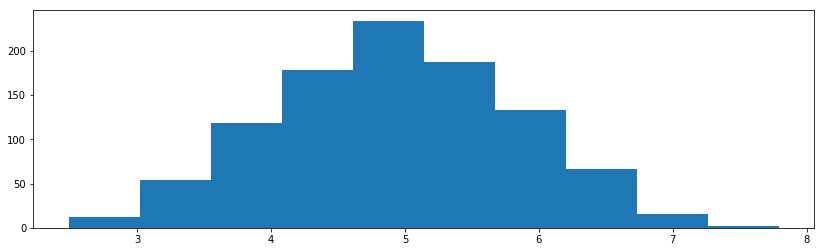

In [5]:
np.random.seed(2)
# Central Limit theorem states: that the means of a subset of samples of any distribution will approximate a gaussian distribution given enough samples.

# Uniform distribution between 0, 10
uniform = stats.uniform(0, 10)

# Sample 10 samples 1000 times and calculate the mean.
means = np.array([uniform.rvs(10).mean() for _ in range(1000)])

plt.figure(figsize=(14, 4))
plt.hist(means)

## Exercise: Fit a gaussian distribution

Fit a gaussian distribution on the `means` array.

Hint: A gaussian has two parameters.


/opt/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


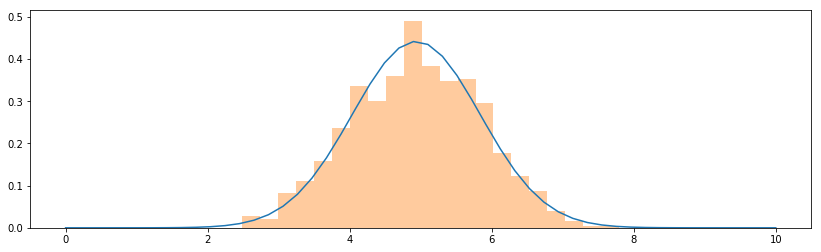

In [6]:
mu = means.mean()
sd = means.std()

m = stats.norm(mu, sd)

x = np.linspace(0, 10)
plt.figure(figsize=(14, 4))
plt.plot(x, m.pdf(x))
sns.distplot(means, kde=False, norm_hist=True)

## What did we just do?

The gaussian we fitted is actually a model that explains the data we've seen.

The models has two parameters $\theta$, the mean $\mu$ and the standard deviation $\sigma$.

We fitted the model on a frequentist way. Our model would have a really bad fit, if we only drew 5 times.

## Cumulative distribution

* A cummulative distribution shows the integral of the probability distribution.
* $Cdf(a)$ = $P(x \le a)$

```python
plt.plot(x, m.pdf(x))
plt.plot(x, m.cdf(x))
```
![](images/cdf.png)

## Exercise

Given our model **m**

* What is $P(x \le 4|\theta)$
* What is $P(x > 8|\theta)$
* What is $P(5 < x < 6|\theta)$
* What is the probability of our data, given our models parameters? $P(x|\theta)$

## Exersice: answers I

Using the cumulative density function:
```python
print(f"""
P(x <= 4) = {m.cdf(4)}
P(x > 8) = {1 - m.cdf(8)}
P(5 < x < 6) = {m.cdf(6) - m.cdf(5)}
""")
```
```text
P(x <= 4) = 0.1495479734480526
P(x > 8) = 0.0003465131086946016
P(5 < x < 6) = 0.3527724808375644
```



## Exersice: answers II

$$P(x|\theta) = \prod_{i=0}^{N}{P(x_i|\theta)}$$

Where $N$ is the number of data points. 

The following code returns `0.0` due to nummerical underflow. $P(x)^N$ leads to very small numbers.
```python
np.prod([m.pdf(x) for x in means])  
```

### Log probability
A trick used is converting to log space. 
Hint: $ln(x \cdot y) = ln(x) + ln(y)$

```python
np.sum([np.log(m.pdf(x)) for x in means])
```

```text
-1316.6759133098722
```


## Likelihood

A distribution is plotted by varying the data $x$ given constant $\theta$ parameters.

$$P(x|\theta)$$

We could also vary the parameters $\theta$ given constant (observed) data $x$.

This is called a likelihood function.

$$\mathcal{L}(\theta|x)$$


## Equivalence principle
"The probability of data conditional on a parameter value equals the likelihood of that parameter value given the same data"

$$P(x|\theta) = \mathcal{L}(\theta|x)$$

Note:

The likelihood function is not a probability distribution.

$$\int_{x=-\infty}^ \infty P(x) dx \neq 1$$

## Bayes' model definition

\begin{equation}
P(\boldsymbol{\theta}\ |\ D) =  \frac{P(D\ |\ \boldsymbol{\theta})\cdot P(\boldsymbol{\theta})}{P(D)}
\end{equation}

Where:
* $P(\boldsymbol{\theta}\ |\ D)$ is the __posterior__: the distribution of the parameter(s) after taking into account the observed data.
* $P(D\ |\ \boldsymbol{\theta})$ is the __likelihood__: the probability of observing data D, given model parameters $\boldsymbol{\theta}$.
* $P(\boldsymbol{\theta})$ represents the __prior__ (initial belief) about the distibution of the model parameters $\boldsymbol{\theta}$.
* $P(D)$ is the __evidence__ of observing $D$. This is a marginal probability. Since this factor is the same for all possible model parameters being considered, it does not influence the _relative_ probabilities of different model parameters.



## Bayes' model definition

\begin{equation}
P(\boldsymbol{\theta}\ |\ D) =  \frac{P(D\ |\ \boldsymbol{\theta})\cdot P(\boldsymbol{\theta})}{P(D)}
\end{equation}

Note that:
The prior and the likelihood are functions, where the evidence is just a constant (Needed for normalization)

## Example

I observe two coin flips [H, H]

Is this a fair coin?

We can model a coin with a Bernoulli distribution. 

$$ x \sim Bernoulli(p) $$

![](images/bernoulli.png)

So we are interested in the parameter $p$ of the distribution.

Let's restrict our model to 3 parameters.

| $\theta$          | $\mathcal{L}$ | prior | unnormalized posterior | posterior            |
|------------|----------|-------|------------------------|----------------------|
| 0.3          | 0.09      | 0.33  | 0.33 * 0.09 = 0.03     | 0.03 / 0.326 = 0.09 |
| 0.5          | 0.025      | 0.33  | 0.33 * 0.025 = 0.083     | 0.083 / 0.326 = 0.26 |
| 0.8          | 0.064      | 0.33  | 0.33 * 0.064 = 0.213     | 0.213 / 0.326 = 0.65  |
| marginal p | -        | 1     | 0.326                  | 1                    |

## Solution in code

```python
prior = np.ones(3) / 3
likelihood = stats.bernoulli(np.array([.3, .5, .8])).pmf(1)**2
unnormalized_posterior = prior * likelihood
normalized_posterior = unnormalized_posterior / np.sum(unnormalized_posterior)
print(normalized_posterior)
```

```text
array([0.09183673, 0.25510204, 0.65306122])
```

## Practicallity

In the previous example we restricted the models parameters. In practical models we can have thousands of parameters, each having an infinite domain. 

Computing $P(D)$ is therefore often impractical / impossible. 

As $P(D)$ is only a normalization constant, algorithms can still approximate a posterior. This is due to posterior being proportional to the prior * likelihood.

$$ P(\theta|D) \propto P(D|\theta) \cdot P(\theta)$$

## PyMC3

* Approximates posterior probability by sampling (for now it's magic ;) )

![](images/PyMC3_banner.svg)

## Same example in PyMC3

In [7]:
coin_flips = [1, 1]
with pm.Model():
    p = pm.Uniform('p', 0, 1)
    
    likelihood = pm.Bernoulli('observed', p=p, observed=coin_flips)
    
    trace = pm.sample(draws=3000)
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 14000/14000 [00:02<00:00, 5751.58draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f049d161630>,
      dtype=object)

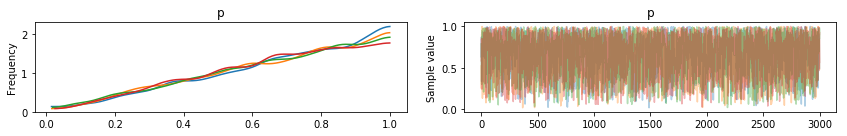

In [8]:
pm.traceplot(trace)

In [9]:
for p in [.3, .5, .8]:
    print(f'P(p < {p}):', (trace['p'] < p).sum() / trace['p'].shape[0])

P(p < 0.3): 0.09008333333333333
P(p < 0.5): 0.24941666666666668
P(p < 0.8): 0.6446666666666667


## Same example in PyMC3

* Do we really have a uniform prior when we have a coin flip?
* Update your prior with a Beta distribution (Tip: Google beta!)


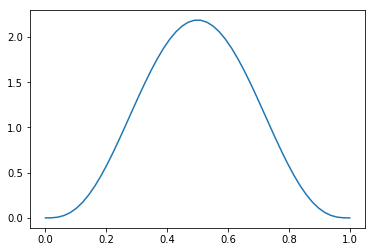

In [10]:
x = np.linspace(0, 1)
plt.plot(x, stats.beta(4, 4).pdf(x))

In [11]:
coin_flips = [1, 1]
with pm.Model():
    p = pm.Beta('p', 4, 4)
    
    likelihood = pm.Bernoulli('observed', p=p, observed=coin_flips)
    
    trace = pm.sample(draws=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 14000/14000 [00:03<00:00, 4603.02draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f048d4c3630>,
      dtype=object)

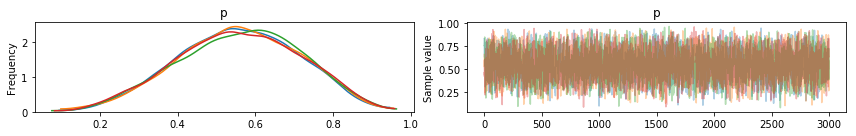

In [12]:
pm.traceplot(trace)

## Who will be elected?

There will be a new referendum about a possible 'Nexit'.

People have to vote $1$ for staying and $0$ for leaving.

Maurice de Hond has done a survey and gives a probability of 

\begin{align}
f(x)= 
\begin{cases}
    0.8,& \text{staying }  \\
    0.2,              & \text{leaving}
\end{cases}
\end{align}

Meanwhile the first votes are coming in. What is the probability of a 'Nexit' occurring?

In [13]:
votes = np.load('data/votes.npy')
votes[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

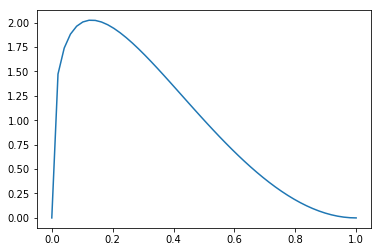

In [14]:
# translate Maurice's probabilities to a prior believe

x = np.linspace(0, 1)
plt.plot(x, stats.beta(1.3, 3).pdf(x))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5357.62draws/s]
The number of effective samples is smaller than 25% for some parameters.


Number of data points: 2


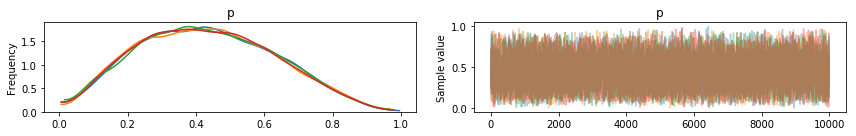

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5601.20draws/s]


Number of data points: 10


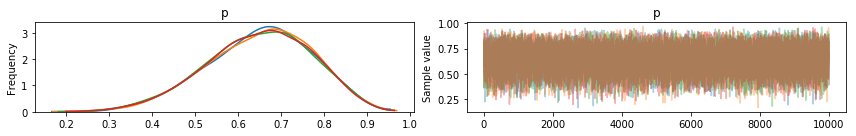

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5444.02draws/s]


Number of data points: 50


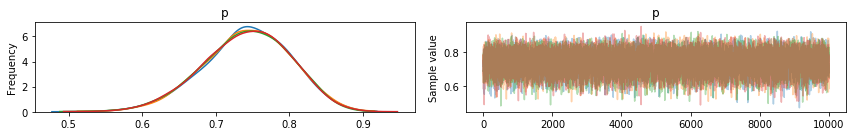

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5619.20draws/s]
The acceptance probability does not match the target. It is 0.8897717351599277, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8937936259844127, but should be close to 0.8. Try to increase the number of tuning steps.


Number of data points: -1


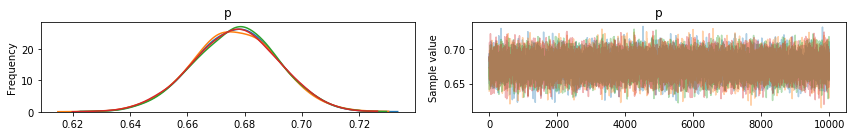

In [15]:
for n in [2, 10, 50, -1]:
    with pm.Model():
        p = pm.Beta('p', 1.3, 3)
        pm.Bernoulli('likelihood', p=p, observed=votes[:n])

        trace = pm.sample(10000)

    print('Number of data points:', n)
    pm.traceplot(trace)
    plt.show()

In [16]:
np.save('data/votes.npy', stats.bernoulli(0.68).rvs(1000))

## A/B/C testing

* Three different colors are tested for the Xomnia website, and randomly assigned to visitors (not uniformly)
* Should we switch colors?
* Assume Xomnia goes bankrupt if we don't get at least 35 calls. We expect 1000 visitors next month, what is the probability that we don't make it? Which color should we use?

color | number of visitors | number of calls
--- | --- | ---
blue | 2000 | 35
red | 500 | 8
green | 1000 | 18

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5808.91draws/s]


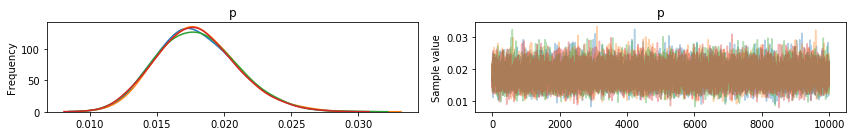

In [17]:
# Simple model for one color

with pm.Model():
    
    # prior
    p = pm.Uniform('p', lower=0, upper=1)
    conversions = pm.Binomial('conversions', 2000, p, observed = [35])
    
    samples = pm.sample(10000)
    
pm.traceplot(samples);

## Combining parameters

* You can easily combine multiple parameters and observations in the same model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5600.55draws/s]


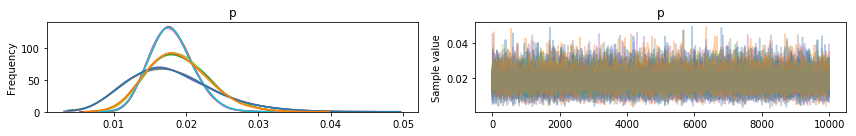

In [18]:
with pm.Model():
    
    p = pm.Uniform('p', lower=0, upper=1, shape=3)
    conversions = pm.Binomial('conv', [2000, 500, 1000], p, observed = [35, 8, 18])
    
    trace = pm.sample(10000)
    
pm.traceplot(trace)

blue = trace['p'][:, 0]
red = trace['p'][:, 1]
green = trace['p'][:, 2]

/opt/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


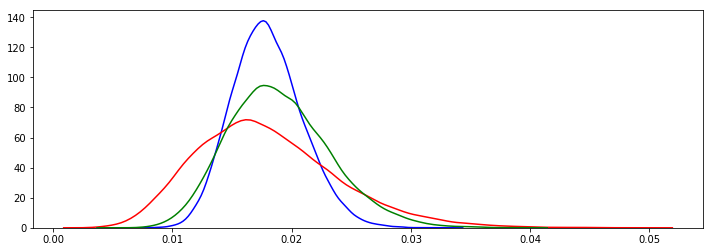

In [19]:
plt.figure(figsize=(12, 4))
sns.distplot(blue, color='blue', hist=False)
sns.distplot(red, color='red', hist=False)
sns.distplot(green, color='green', hist=False)

## Posterior samples

* `pymc3` does not generate a real distribution, but samples from the posterior distribution.
* With those samples you can 
  * Understand the data, draw conclusions
  * Generate predictions

## Exercise
1. What is the probability that the conversion rate of blue is higher than 2%?
2. Which color should we choose?


In [20]:
(blue > 0.02).sum() / blue.shape[0]

0.2357

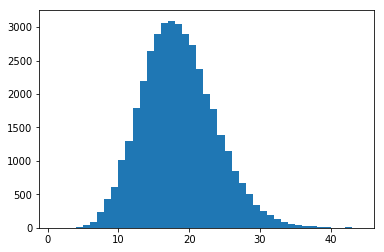

In [34]:
calls = stats.binom(n=1000, p=blue).rvs()
fig = plt.hist(calls, bins=calls.max() - calls.min())

In [59]:
calls = stats.binom(n=1000, p=np.stack([blue, red, green])).rvs()
calls

array([[16, 23, 17, ..., 19, 24, 19],
       [13, 19, 23, ...,  8, 28, 17],
       [17, 20, 20, ..., 21, 10, 29]])

(0, 40)

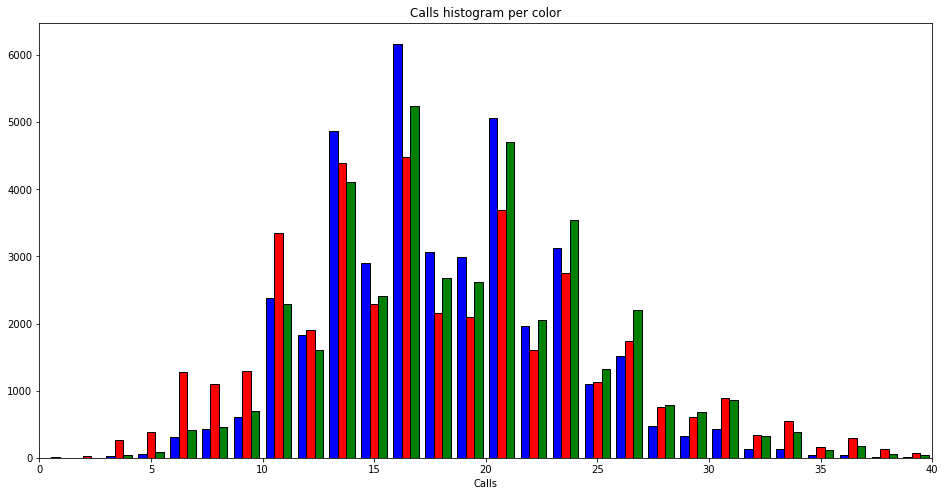

In [74]:
plt.figure(figsize=(16, 8))
plt.title('Calls histogram per color')
plt.hist(calls.T, (calls.max(1) - calls.min(1)).min(), color='brg', ec='black')
plt.xlabel('Calls')
plt.xlim(0, 40)

[0.00165  0.019875 0.009775]


<BarContainer object of 3 artists>

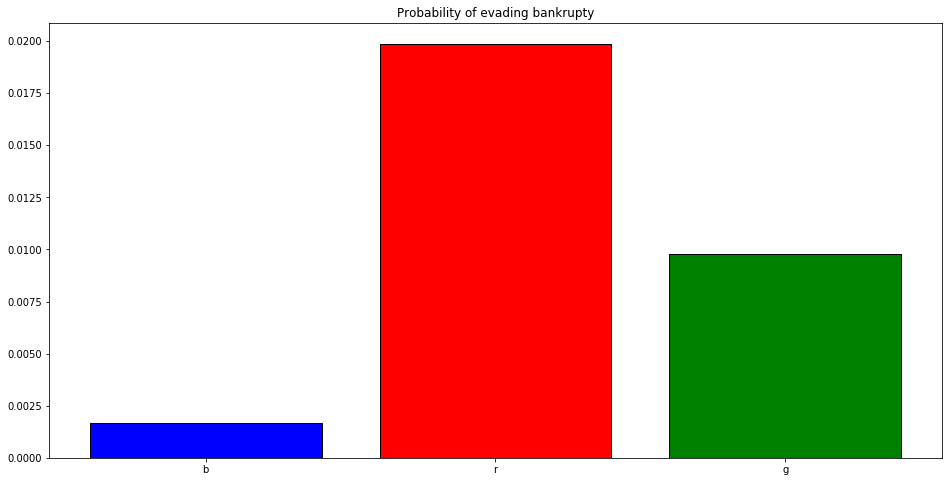

In [72]:
mean = (calls > 35).mean(1)
print(mean)

plt.figure(figsize=(16, 8))
plt.title('Probability of evading bankrupty')
plt.bar(np.array(list('brg')), mean, color='brg', ec='black')
